In [1]:
import pandas as pd
import sqlite3
import time
import datetime
import random
import pytz
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dateutil import parser
from matplotlib import style

In [2]:
def graph_data_up(hours):
    
    # get the data for the four upstream channels
    conn = sqlite3.connect('MB7621.db')
    df = pd.read_sql_query('''
        SELECT 
            cast(Pwr_dBmV as double) as Pwr_dBmV_dbl, 
            cast(Channel as integer) as Channel_int, 
            cast(Freq_MHz as integer) as Freq_MHz_dbl,

            timestamp
        from 
            conn_up
        WHERE 
            timestamp > (SELECT DATETIME('now','localtime', '-{0} hours'))
    '''.format(hours), conn)
    conn.close()

    df.timestamp= pd.to_datetime(df.timestamp).dt.tz_convert(pytz.timezone('US/Pacific'))
    tz = df.timestamp.dt.tz
    plt.rcParams['figure.figsize'] = [20, 8]
    plt.rcParams['figure.facecolor'] = 'darkgray'
    fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True, sharey=True, gridspec_kw={'hspace': .1})
    xval='timestamp'
    yval='Pwr_dBmV_dbl'
    channels = 4
    data = []
    colors = ['red','blue','green','orange']
    for i in range(0,channels):
        data.append(df[df.Channel_int == (i+1)])
        ax[i].plot_date(data[i][xval], data[i][yval],linestyle='-',linewidth=0,marker='o',markersize=2,color=colors[i])
        freq = data[i]['Freq_MHz_dbl'].iloc[0]
        ax[i].set_ylabel('ch {0}\n({1}MHz)'.format(i+1,freq))

    
    for axs in ax:
        axs.grid(axis='x',which='major',color='black',alpha=1)
        axs.grid(axis='y',which='major',color='gray',alpha=1)
        axs.grid(axis='x',which='minor',color='black',alpha=.2)
        axs.xaxis.set_major_locator(mdates.HourLocator(interval=3))
        axs.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
        axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d %H:%M %Z', tz=tz))
        axs.set_facecolor('lightgray')

    fig.suptitle("Upstream Power [dBmV]",fontsize=20)
    fig.autofmt_xdate()
    plt.savefig("upstream.png")


In [3]:
def graph_data_down(hours):
    
    # get the data for the four upstream channels
    conn = sqlite3.connect('MB7621.db')
    df = pd.read_sql_query('''
        SELECT 
            cast(Pwr_dBmV as double) as Pwr_dBmV_dbl, 
            cast(Channel as integer) as Channel_int,
            cast(Freq_MHz as integer) as Freq_MHz_dbl,
            timestamp
        from 
            conn_down
        WHERE 
            timestamp > (SELECT DATETIME('now','localtime', '-{0} hours'))
    '''.format(hours), conn)
    conn.close()

    channels = 24

    df.timestamp= pd.to_datetime(df.timestamp).dt.tz_convert(pytz.timezone('US/Pacific'))
    tz = df.timestamp.dt.tz
    plt.rcParams['figure.figsize'] = [20, 40]
    plt.rcParams['figure.facecolor'] = 'darkgray'
    fig, ax = plt.subplots(nrows=channels, ncols=1, sharex=True, sharey=True, gridspec_kw={'hspace': .1})
    xval='timestamp'
    yval='Pwr_dBmV_dbl'
    data = []
    colors = ['red','blue','green','orange']
    for i in range(0,channels):
        data.append(df[df.Channel_int == (i+1)])
        ax[i].plot_date(data[i][xval], data[i][yval],linestyle='-',linewidth=0,marker='o',markersize=2,color=colors[i%4])
        freq = data[i]['Freq_MHz_dbl'].iloc[len(data[i])-1]
        ax[i].set_ylabel('ch {0}\n({1}MHz)'.format(i+1,freq))
    
    for axs in ax:
        axs.grid(axis='x',which='major',color='black',alpha=1)
        axs.grid(axis='y',which='major',color='gray',alpha=1)
        axs.grid(axis='x',which='minor',color='black',alpha=.2)
        axs.xaxis.set_major_locator(mdates.HourLocator(interval=3))
        axs.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
        axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d %H:%M %Z', tz=tz))
        axs.set_facecolor('lightgray')

    fig.suptitle("Downstream Power [dBmV]",fontsize=20)
    fig.autofmt_xdate()
    plt.subplots_adjust(top=.97)
    plt.savefig("downstream.png")


In [9]:
hours = 24

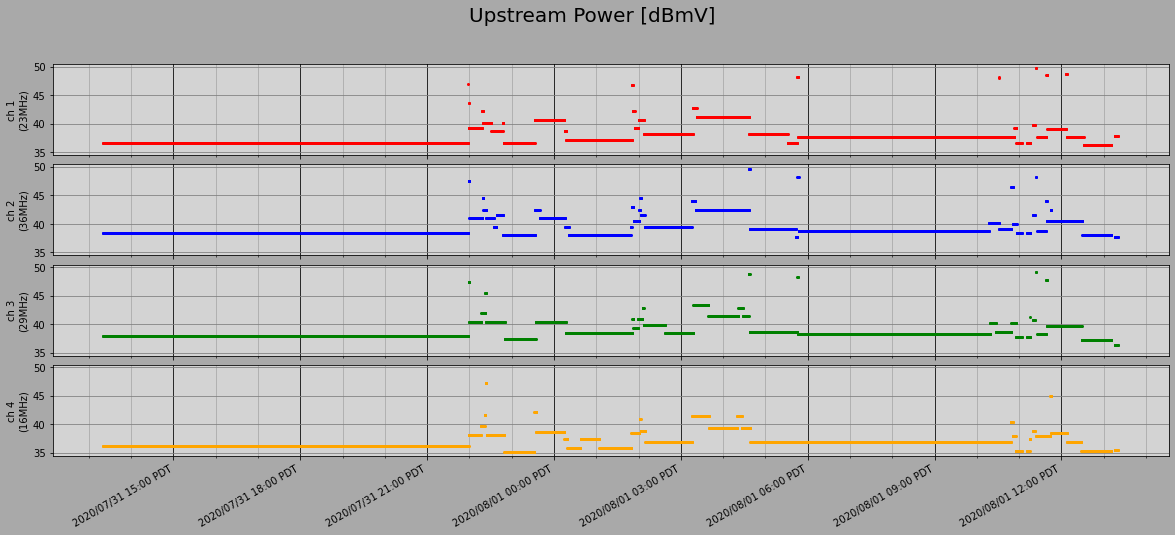

In [10]:
graph_data_up(hours)

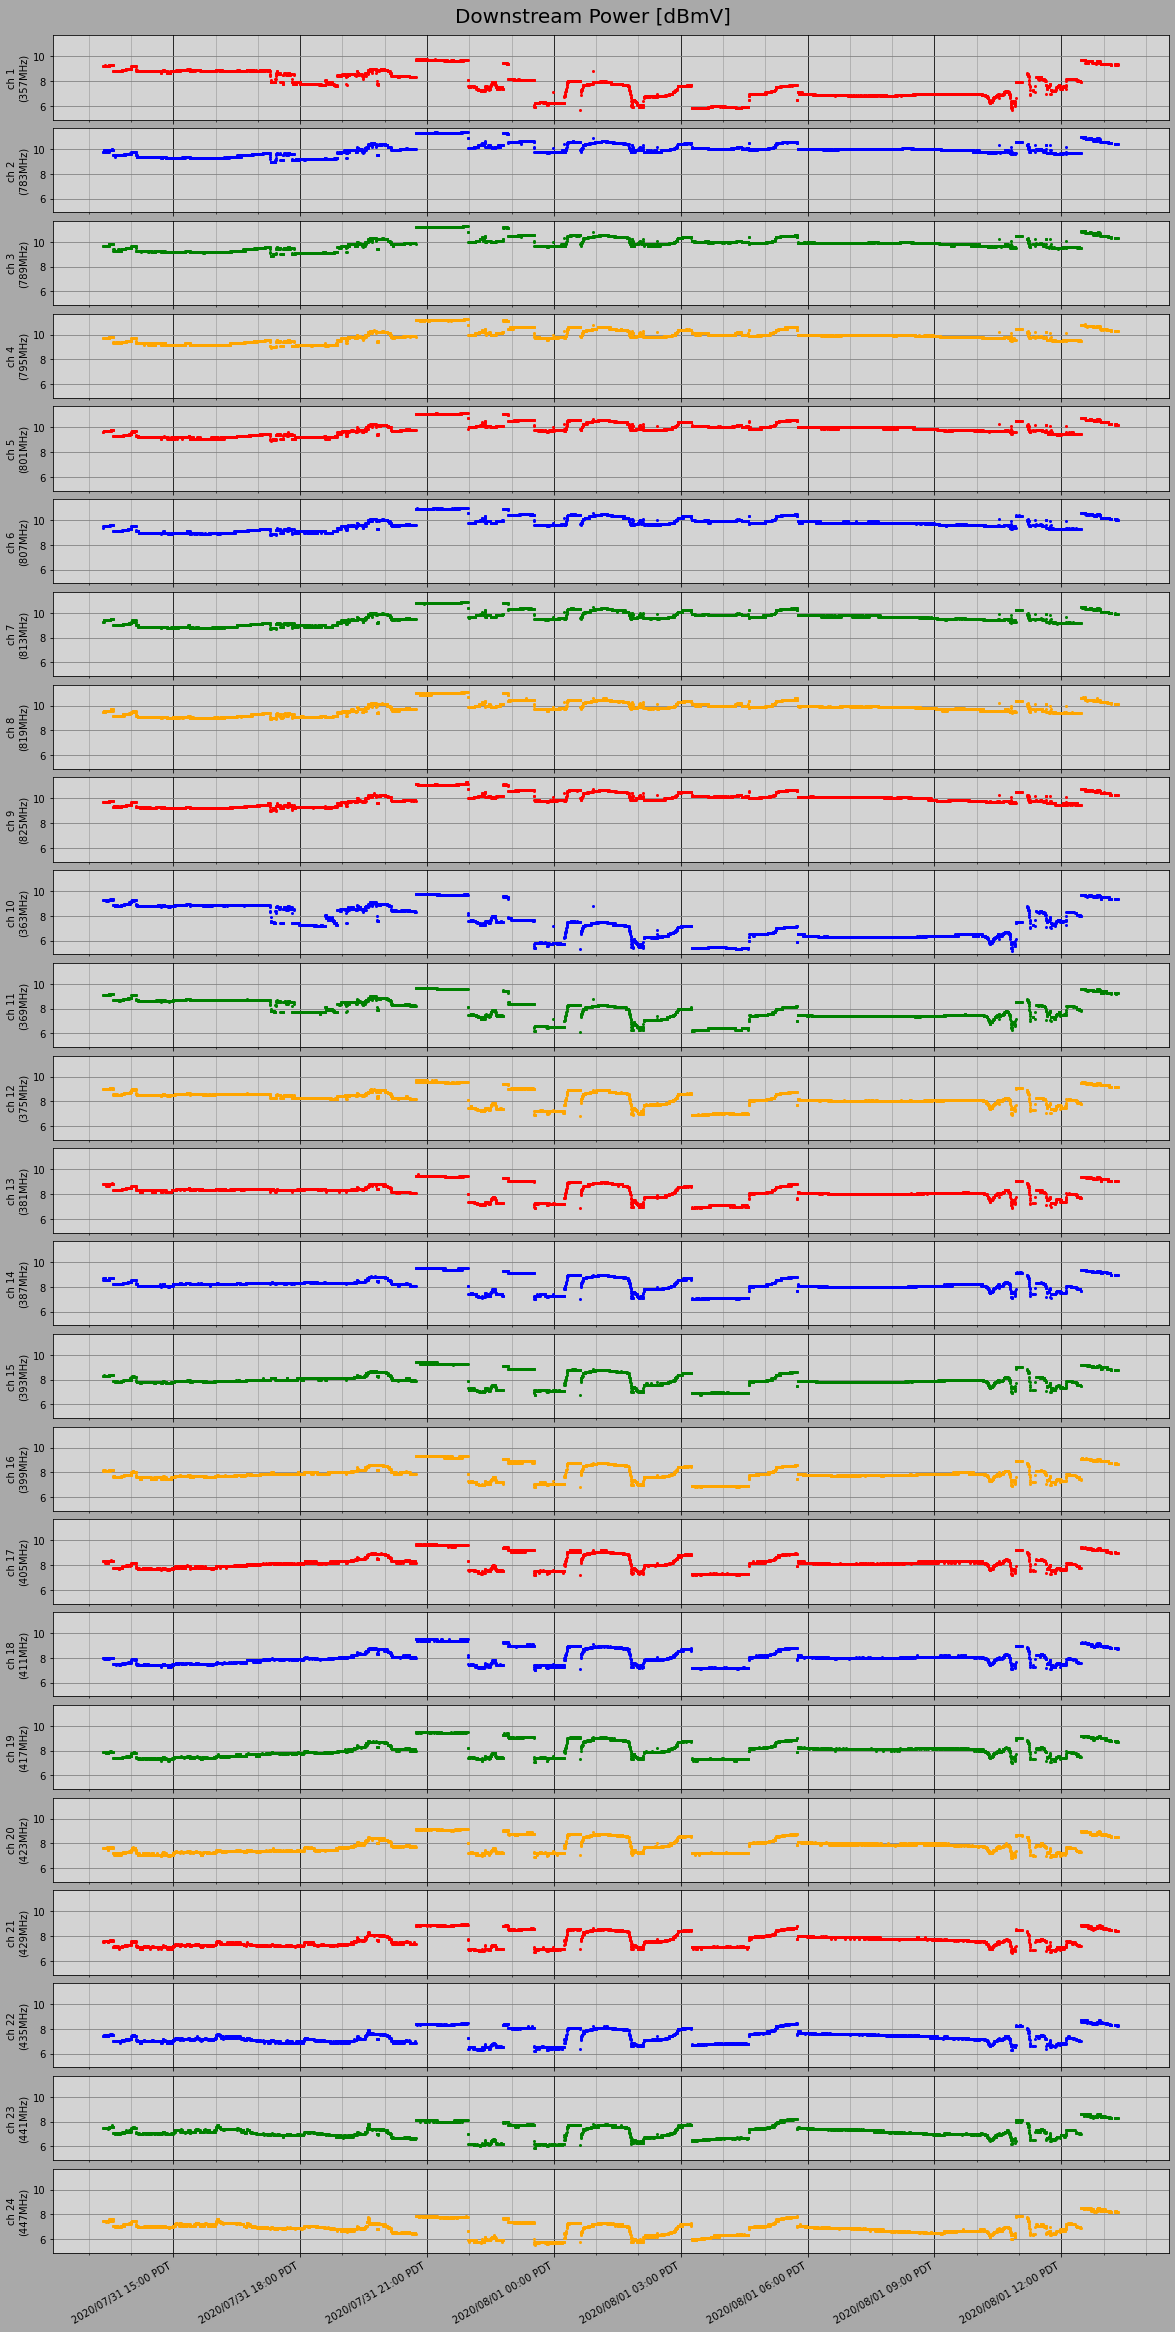

In [11]:
graph_data_down(hours)